In [9]:
import os
import json
import matplotlib.pyplot as plt
import tldextract
from collections import Counter


vanilla_dir = "C:/Users/18707/Desktop/tracker-radar-collector/vanilla_data"
adblock_dir = "C:/Users/18707/Desktop/tracker-radar-collector/adblock_data"
standard_file = "C:/Users/18707/Desktop/tracker-radar-collector/standard-headers.txt"

def count_requests(data_dir):
    counts = {}
    total_requests = 0 
    
    for filename in os.listdir(data_dir):
        if filename.endswith(".json"):
            with open(os.path.join(data_dir, filename), "r") as file:
                data = json.load(file)
                initial_url = data.get("initialUrl")
                
# doing this check because i got an error message otherwise 
                if initial_url is not None:
                    parsed_url = tldextract.extract(initial_url)
                    domain = parsed_url.domain

                    requests = data.get("data", {}).get("requests", [])
                    requests_count = 0
                    for request in requests:
                        request_url = request.get("url")
                        parsed_request_url = tldextract.extract(request_url)
                        request_domain = parsed_request_url.domain
                        if domain != request_domain:
                            requests_count += 1
                counts[domain] = requests_count
                total_requests += requests_count
                
    return counts, total_requests

def count_cookies(data_dir):
    counts = {}
    total_requests = 0 
        
    for filename in os.listdir(data_dir):
        if filename.endswith(".json"):
            with open(os.path.join(data_dir, filename), "r") as file:
                data = json.load(file)
                initial_url = data.get("initialUrl")
                
                if initial_url is not None:
                    parsed_url = tldextract.extract(initial_url)
                    domain = parsed_url.domain
                    cookies = data.get("data", {}).get("cookies", [])
                    
                    for cookie in cookies:
                        if "domain" in cookie:
                            cookie_domain = cookie["domain"]
                            parsed_cookie_domain = tldextract.extract(cookie_domain)
                            if domain != (parsed_cookie_domain.domain):
                                if domain not in counts:
                                    counts[domain] = 1
                                else:
                                    counts[domain] +=1
                                total_requests += 1
                                
    return counts, total_requests

 
def count_api(data_dir):
    api_calls = {}
    total_requests = 0 
    
    for filename in os.listdir(data_dir):
        if filename.endswith(".json"):
            with open(os.path.join(data_dir, filename), "r") as file:
                data = json.load(file)
                callStats = data.get("data", {}).get("apis", {}).get("callStats", {})
                initial_url = data.get("initialUrl")
 # doing this check because i got an error message otherwise 
                if initial_url is not None:
                    parsed_url = tldextract.extract(initial_url)
                    domain = parsed_url.domain
                    num_calls = len(callStats)
                    api_calls[domain] = num_calls
                    total_requests += num_calls
                    
    return api_calls, total_requests


def count_header(data_dir):
    custom_headers = {}
    total_requests = 0 
    
    with open(standard_file, "r") as file:
        standard_headers = file.read().splitlines()
    
    for filename in os.listdir(data_dir):
        if filename.endswith(".json"):
            with open(os.path.join(data_dir, filename), "r") as file:
                data = json.load(file)
                initial_url = data.get("initialUrl")
                
# doing this check because i got an error message otherwise                 
                if initial_url is not None:
                    parsed_url = tldextract.extract(initial_url)
                    domain = parsed_url.domain
                    requests = data.get("data", {}).get("requests", [])

                    custom_headers_count = 0
                    for request in requests:
                        response_headers = request.get("responseHeaders", {})
                        
                        for header_name in response_headers:
                            if header_name not in standard_headers:
                                custom_headers_count += 1

                    custom_headers[domain] = custom_headers_count
                    total_requests += custom_headers_count
    return custom_headers, total_requests

def get_top_10(data):
    domain_counts = Counter(data)
    top_10_domains = domain_counts.most_common(10)
    return top_10_domains

def plot_requests_distribution(data, types, mode):
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(data)), list(data.values()), align='center', color='skyblue')
    plt.xticks(range(len(data)), list(data.keys()), rotation=90)
    plt.title(f"Distribution of Third-Party {types} in {mode} Mode")
    plt.xlabel("Website Domain")
    plt.ylabel(f"Number of Third-Party {types}")
    plt.tight_layout()
    plt.show()
    

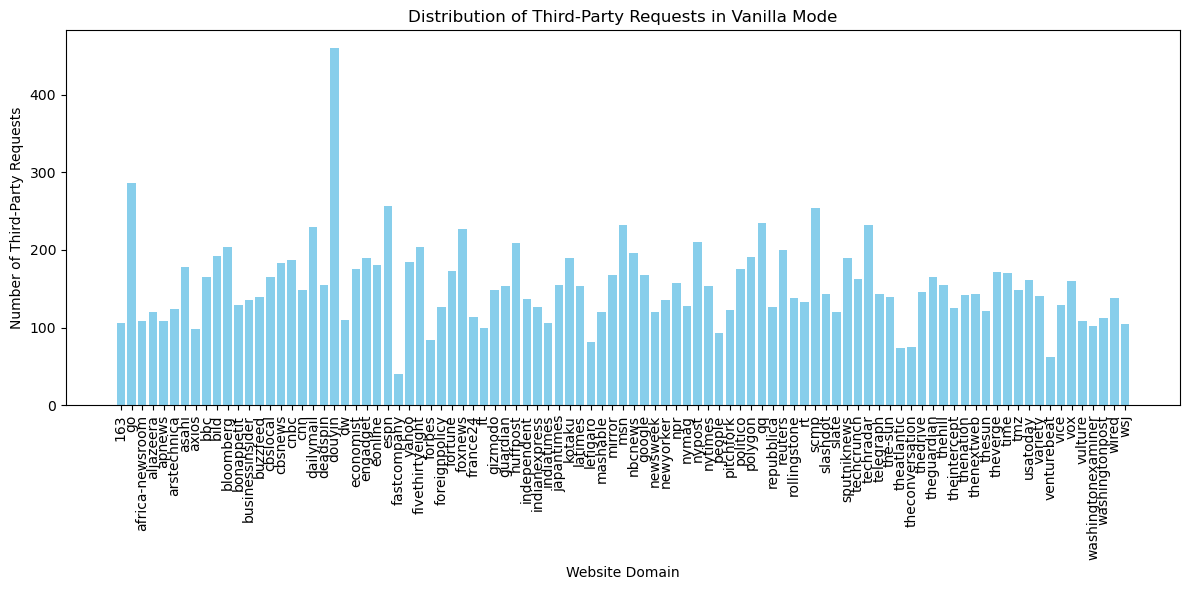

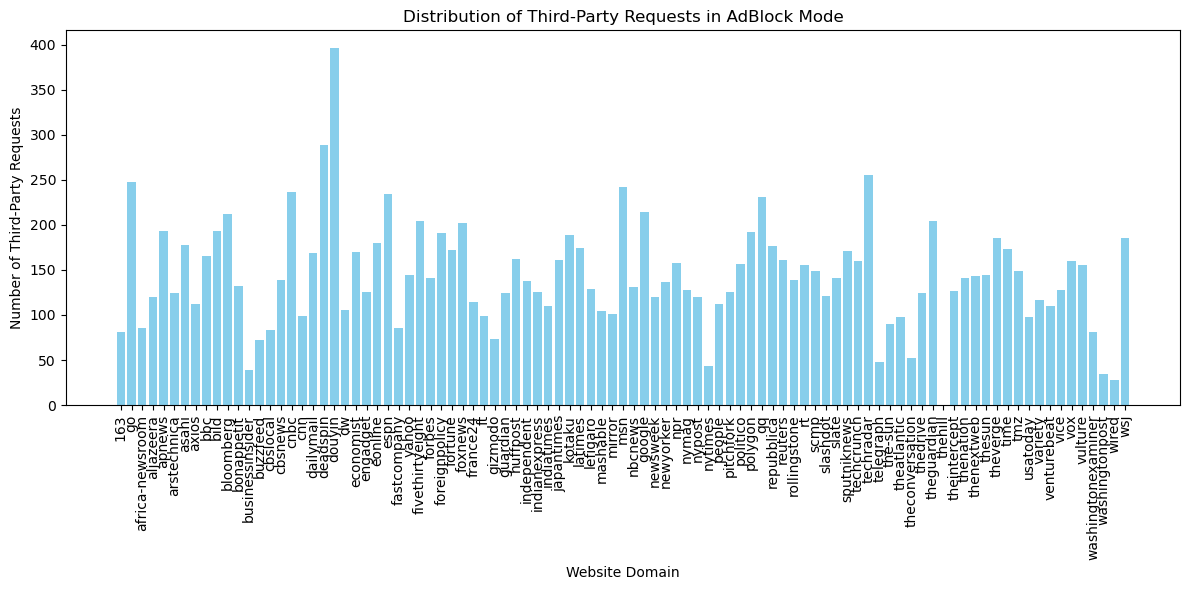

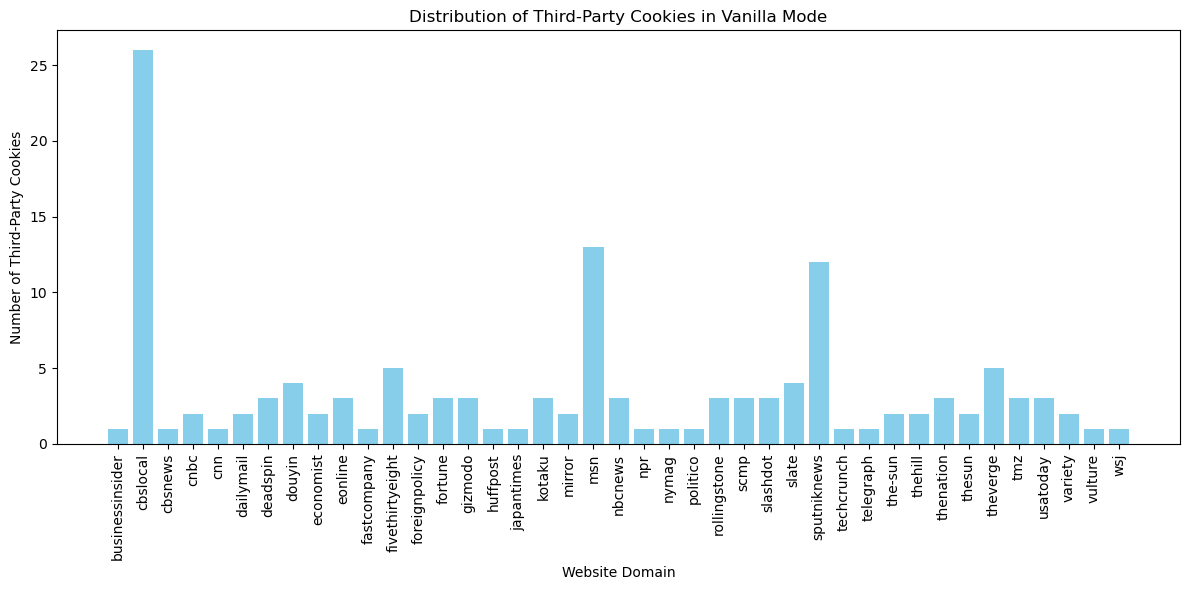

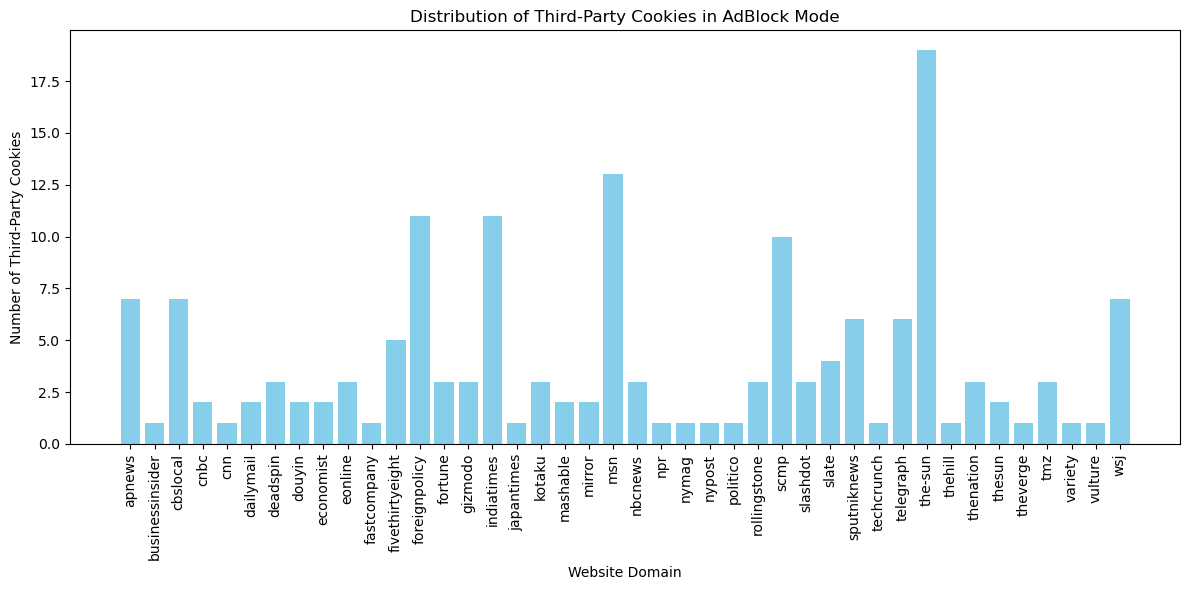

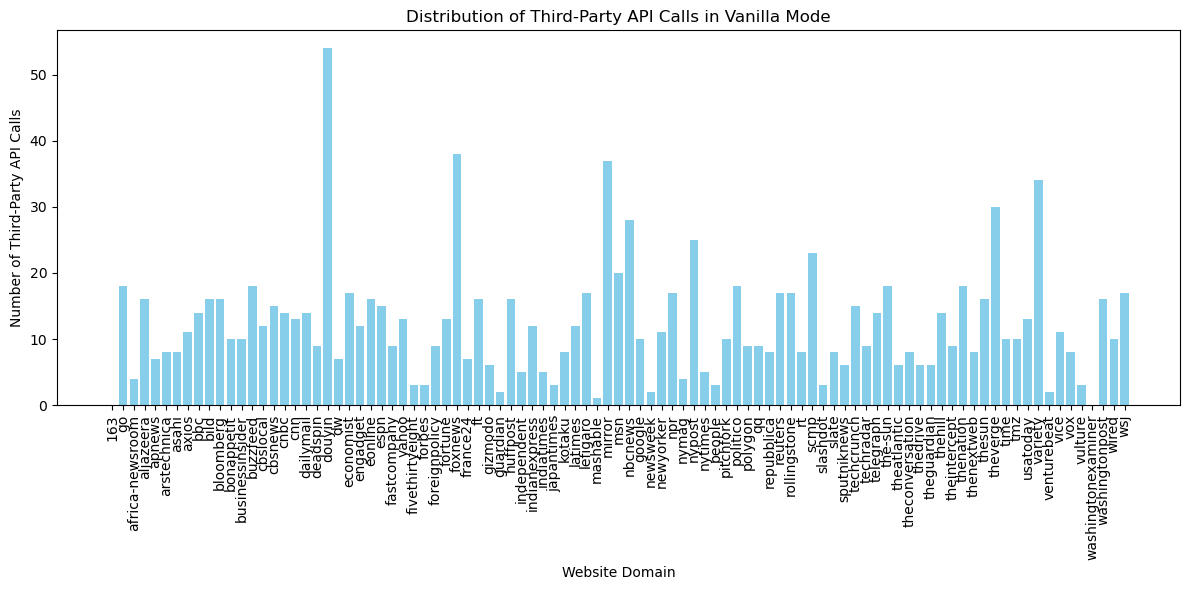

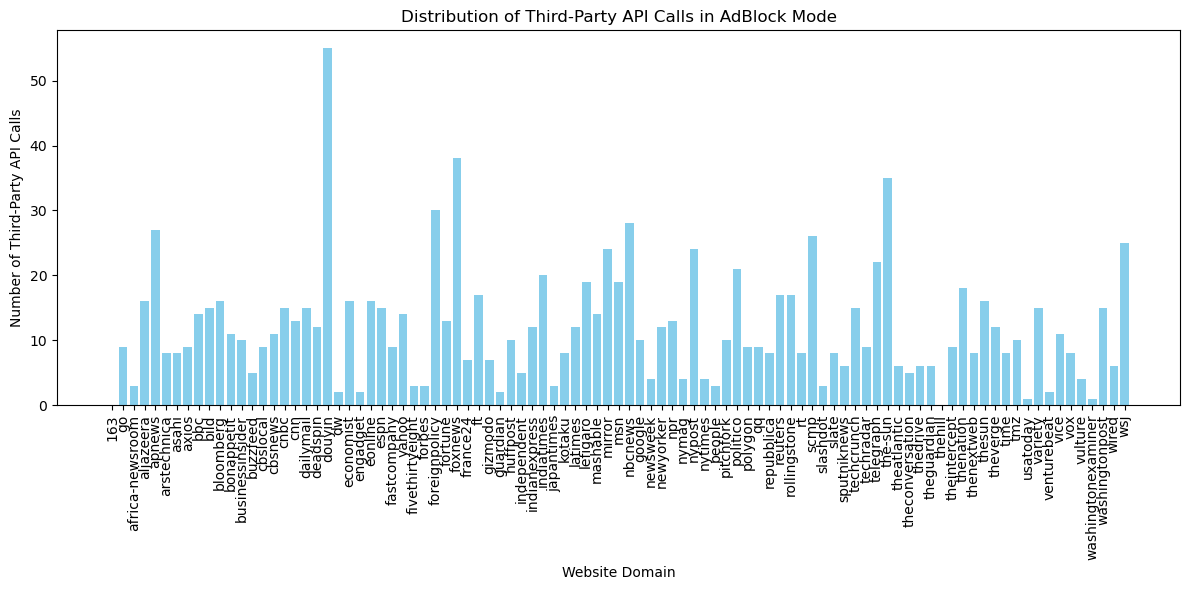

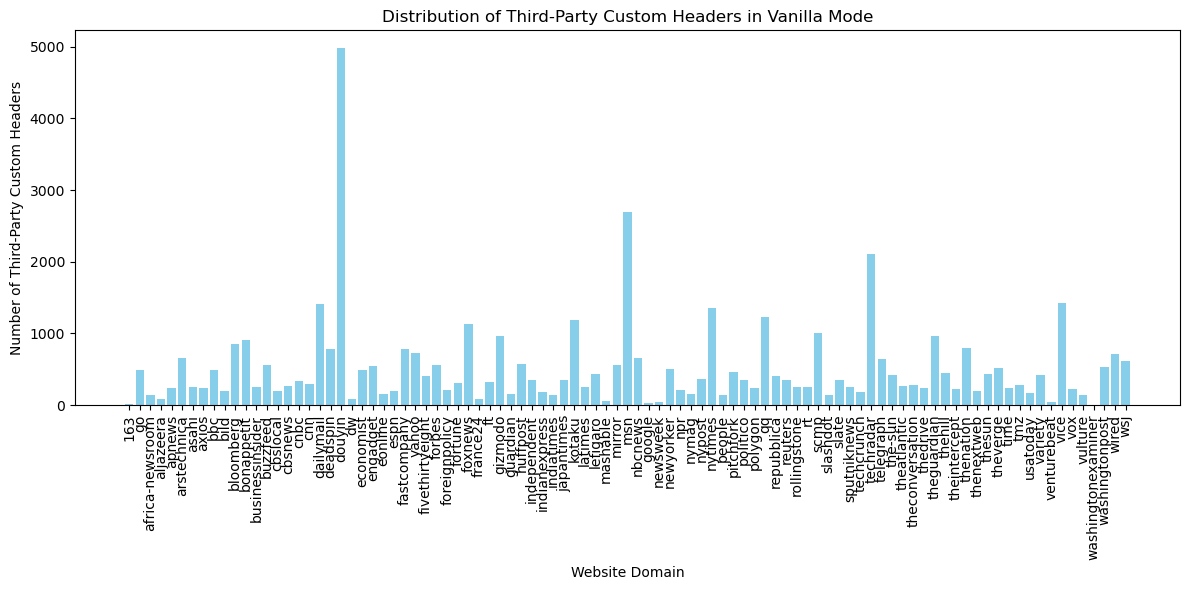

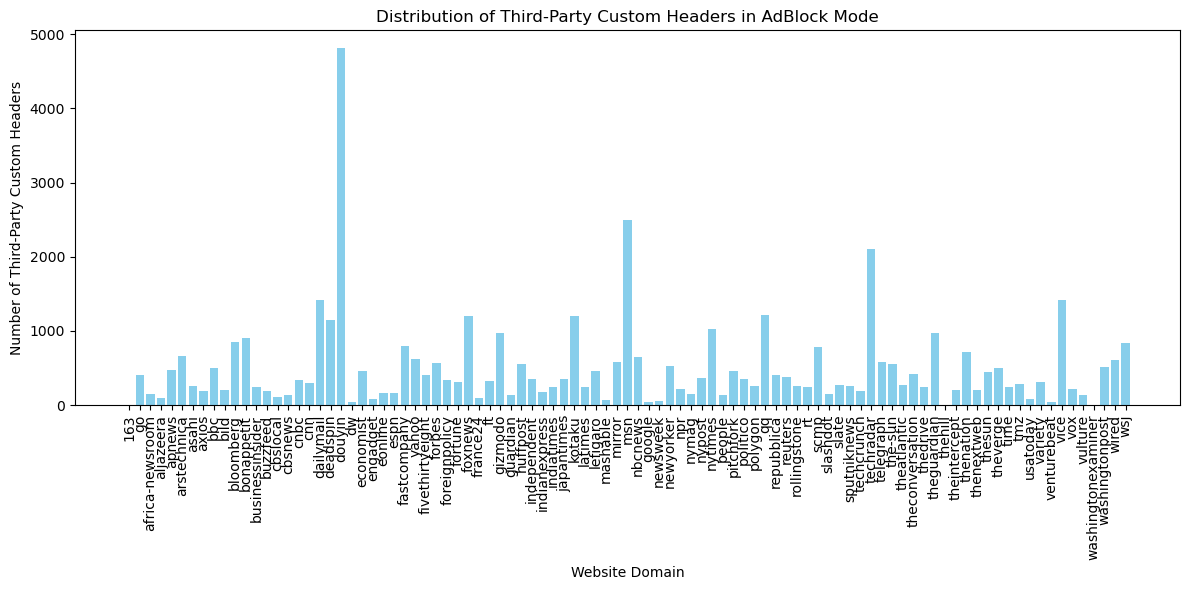

In [10]:
    
vanilla_requests, total_v_requests = count_requests(vanilla_dir)
plot_requests_distribution(vanilla_requests, "Requests", "Vanilla")
    
add_requests, total_a_requests = count_requests(adblock_dir)
plot_requests_distribution(add_requests,"Requests", "AdBlock")


vanilla_cookies, total_v_cookies = count_cookies(vanilla_dir)
plot_requests_distribution(vanilla_cookies, "Cookies", "Vanilla")

add_cookies, total_a_cookies = count_cookies(adblock_dir)
plot_requests_distribution(add_cookies, "Cookies", "AdBlock")


vanilla_apis, total_v_apis= count_api(vanilla_dir)
plot_requests_distribution(vanilla_apis, "API Calls", "Vanilla")

add_apis, total_a_apis = count_api(adblock_dir)
plot_requests_distribution(add_apis, "API Calls", "AdBlock")


vanilla_header, total_v_header= count_header(vanilla_dir)
plot_requests_distribution(vanilla_header, "Custom Headers", "Vanilla")

add_header, total_a_header= count_header(adblock_dir)
plot_requests_distribution(add_header, "Custom Headers", "AdBlock")

In [11]:

top_request = get_top_10(vanilla_requests)
print("Top 10 Third-Party Domains for Request URLs in Vanilla")
for domain, count in top_request:
    print(f"{domain}: {count}")
    
    
    
    
top_request = get_top_10(add_requests)
print("Top 10 Third-Party Domains for Request URLs in AdBlock")
for domain, count in top_request:
    print(f"{domain}: {count}")
    
print(f"Total Vanilla: {total_v_requests}")
print(f"Total add: {total_a_requests}")   
    
    
    
    
top_cookie = get_top_10(vanilla_cookies)
print("\nTop 10 Third-Party Domains for Cookies in Vanilla")
for domain, count in top_cookie:
    print(f"{domain}: {count}")

    
    
    
top_cookie = get_top_10(add_cookies)
print("\nTop 10 Third-Party Domains for Cookies in AdBlock")
for domain, count in top_cookie:
    print(f"{domain}: {count}")   
    
print(f"Total Vanilla: {total_v_cookies}")
print(f"Total adds: {total_a_cookies}")  



top_api = get_top_10(vanilla_apis)
print("\nTop 10 Third-Party Domains for JavaScript Api Calls")
for domain, count in top_api:
    print(f"{domain}: {count}")

    
top_api = get_top_10(add_apis)
print("\nTop 10 Third-Party Domains for JavaScript Api Calls")
for domain, count in top_api:
    print(f"{domain}: {count}")
    
print(f"Total Vanilla: {total_v_apis}")
print(f"Total add: {total_a_apis}")  



top_header = get_top_10(vanilla_header)
print("\nTop 10 Third-Party Domains for Custom Headers")
for domain, count in top_header:
    print(f"{domain}: {count}")
    
top_header = get_top_10(add_header)
print("\nTop 10 Third-Party Domains for Custom Headers")
for domain, count in top_header:
    print(f"{domain}: {count}")
    
print(f"Total Vanilla: {total_v_header}")
print(f"Total adds: {total_a_header}")  

Top 10 Third-Party Domains for Request URLs in Vanilla
douyin: 460
go: 286
espn: 257
scmp: 254
qq: 235
msn: 232
techradar: 232
dailymail: 229
foxnews: 227
nypost: 210
Top 10 Third-Party Domains for Request URLs in AdBlock
douyin: 396
deadspin: 289
techradar: 255
go: 248
msn: 242
cnbc: 236
espn: 234
qq: 231
google: 214
bloomberg: 212
Total Vanilla: 15421
Total add: 14212

Top 10 Third-Party Domains for Cookies in Vanilla
cbslocal: 26
msn: 13
sputniknews: 12
fivethirtyeight: 5
theverge: 5
douyin: 4
slate: 4
deadspin: 3
eonline: 3
fortune: 3

Top 10 Third-Party Domains for Cookies in AdBlock
the-sun: 19
msn: 13
foreignpolicy: 11
indiatimes: 11
scmp: 10
apnews: 7
cbslocal: 7
wsj: 7
sputniknews: 6
telegraph: 6
Total Vanilla: 136
Total adds: 163

Top 10 Third-Party Domains for JavaScript Api Calls
douyin: 54
foxnews: 38
mirror: 37
variety: 34
theverge: 30
nbcnews: 28
nypost: 25
scmp: 23
msn: 20
go: 18

Top 10 Third-Party Domains for JavaScript Api Calls
douyin: 55
foxnews: 38
the-sun: 35
for